# Midterm
Kabilan Sriranjan
17/03/18

In [162]:
import math
import numpy as np
import scipy.special as scp
import matplotlib.pyplot as plt

# Part 2

To investigate Runge's phenomenon I used the logit function but with the denominator squared.

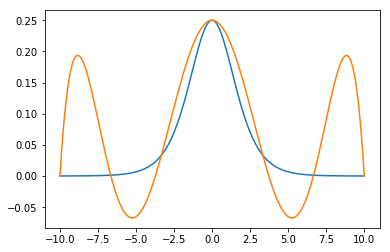

In [176]:
def f(x):
    return np.exp(x)/(1+np.exp(x))**2

#Take a function f, a list of nodes, and a set of values and evaluates the Lagrange polynomial at each value
def LInterp(f, nodes, x):
    V = np.vander(nodes)
    alpha = np.linalg.solve(V, f(nodes))
    L = np.vander(x)[:,-alpha.size:]
    return L.dot(alpha)

minimum = -10
maximum = 10
n = 7
nodes = np.linspace(minimum,maximum,n)
   
x = np.linspace(minimum,maximum,200)
y = f(x)
y2 = LInterp(f, nodes, x)
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

The wide oscillations near the boundary are due to Runge's phenomenon.

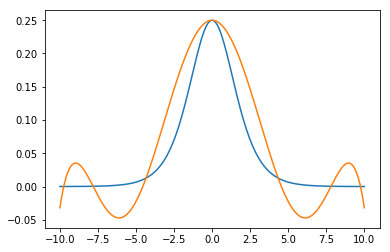

In [177]:
#Take a minimum, maximum, and an n and returns the Chebyshev nodes in increasing order
def chebyNodes(minimum, maximum, n):
    k = np.array(range(1,n+1))
    return ((minimum+maximum)/2 + np.cos((2*k-1)*(np.pi)/(2*n))*(maximum-minimum)/2)[::-1]

y3 = LInterp(f, chebyNodes(minimum, maximum, n), x)
plt.plot(x,y)
plt.plot(x,y3)
plt.show()

By using Chebyshev's nodes instead of evenly places ones our interpolation is much better.

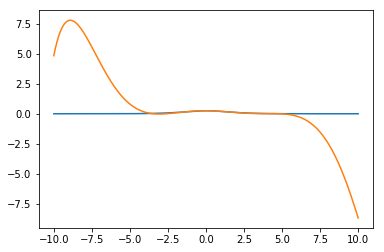

In [179]:
#Take values n, k, and x and compute the (n,j) Bernstein polynomial at x
def bernBasis(n, k, x):
    return scp.binom(n,k)*(x**k)*(1-x)**(n-k)

#Take a function f, a degree n, and a value x to evaluate the Bernstein polynomial at x
def bernPoly(f, n, x):
    b = 0
    for k in range(0, n+1):
        b = b + f(k/n)*bernBasis(n, k, x)
    return b

y4 = bernPoly(f, n, x)
plt.plot(x,y)
plt.plot(x,y4)
plt.show()

By approximating with Bernstein polynomials we have found a near perfect approximation in the middle of the interval that varies widely at the edges.

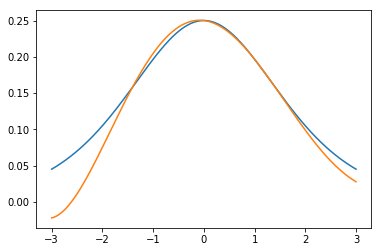

In [180]:
newX = np.linspace(-3, 3, 200)
newY = f(newX)
y5 = bernPoly(f, n, newX)
plt.plot(newX, newY)
plt.plot(newX, y5)
plt.show()

Here we have a zoomed in plot of the Bernstein polynomial approximation to see how it behaves. The approximation is very close, taking note of the scaling of the y axis.